# Visualization of results

## Import general libraries and dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections
import os
import sys
sys.path.append("../")

from scipy import stats
from scipy.optimize import curve_fit

from config import results_folder, plots_folder

In [2]:
plt.style.use('bmh')
%matplotlib inline
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 4
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

## Utility functions

In [3]:
def boltzmann_distribution_2D(v, kT, m):
    return (m/kT)*v*np.exp(-m*v**2/(2*kT))

def average_histogram(eq_speeds, number_of_runs, number_of_bins, m):
    hist_matrix = np.zeros((number_of_runs, number_of_bins))
    for i in range(number_of_runs):
        hist_matrix[i, :], bin_edges = np.histogram(eq_speeds[i, :], bins=number_of_bins, range=(0, 1), density=True)
#         kT = compute_kT(eq_speeds[i, :], m)
#         plt.bar(bin_edges[:-1], hist_matrix[i, :], width=0.6/number_of_bins, align='edge', label='Measured')
#         plt.plot(v, boltzmann_distribution_2D(v, kT, m), 'r', label='M-B distribution')
#         plt.show()
    hist_matrix = np.average(hist_matrix, axis=0)
    return hist_matrix, bin_edges

def compute_kT(eq_speeds, m):
    shape_array = np.shape(eq_speeds)
    if len(shape_array) == 1:
        average_kin_energy = np.sum(eq_speeds**2)*m/(2*len(eq_speeds))
    else:
        average_kin_energy = np.sum(eq_speeds[0,:]**2)*m/(2*len(eq_speeds[0, :]))
    kT = average_kin_energy
    return kT

def mean_free_path(N, radius):
    return 1/(np.sqrt(8)*N*2*radius)

## Collision queue scaling

In [88]:
coll_q_matrix_1000 = np.load(file=os.path.join(results_folder, 'collision_q_length_N_1000.npy'))
coll_q_matrix_2000 = np.load(file=os.path.join(results_folder, 'collision_q_length_N_2000.npy'))

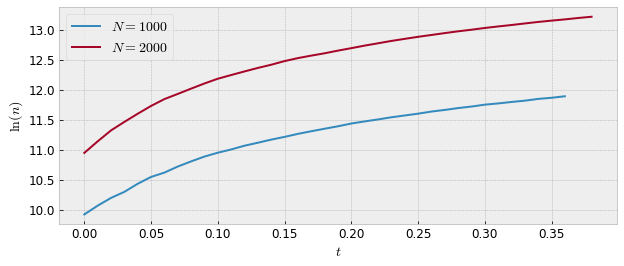

In [90]:
#plt.figure(figsize=(20, 10))
plt.figure()
plt.plot(coll_q_matrix_1000[:, 0], np.log(coll_q_matrix_1000[:, 1]), label=r'$N=1000$')
plt.plot(coll_q_matrix_2000[:, 0], np.log(coll_q_matrix_2000[:, 1]), label=r'$N=2000$')
plt.xlabel(r'$t$')
plt.ylabel(r'$\ln{(n)}$')
#plt.title('Number of elements in priority queue as function of time')
plt.legend()
#plt.tight_layout()
#plt.grid()
plt.savefig(os.path.join(plots_folder, 'length_collision_queue.pdf'))
plt.show()

## Scattering angle as a function of impact parameter

In [71]:
scattering_angle_matrix = np.load(file=os.path.join(results_folder, 'scattering_angle_func_impact_parameter.npy'))

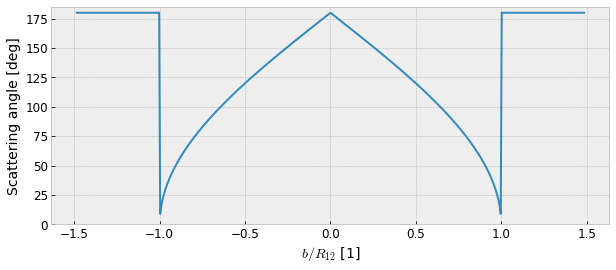

In [92]:
#plt.figure(figsize=(15, 7))
plt.figure()
plt.plot(scattering_angle_matrix[:, 0], scattering_angle_matrix[:, 1]*180/np.pi)
#plt.title('Scattering angle as a function of impact parameter')
plt.xlabel(r'$b/R_{12}$ [1]')
plt.ylabel(r'Scattering angle [deg]')
plt.ylim([0, 185])
#plt.grid()
#plt.tight_layout()
plt.savefig(os.path.join(plots_folder, 'scattering_angle.pdf'))
plt.show()

## Speed distribution for equal particles
Parameters used:
- N = 2000
- Xi = 1
- v_0 = 0.2
- m = 1
- radius = 0.007
- stopping criterion: avg_collisions = 0.02*N
- number of runs = 5

In [93]:
initial_energy_matrix = np.load(file=os.path.join(results_folder, 'distributionEqParticles_N_2000_init_energy_matrix.npy'))
initial_speeds = initial_energy_matrix[:, 1]
N = 2000
number_of_runs = 30
number_of_bins = 140

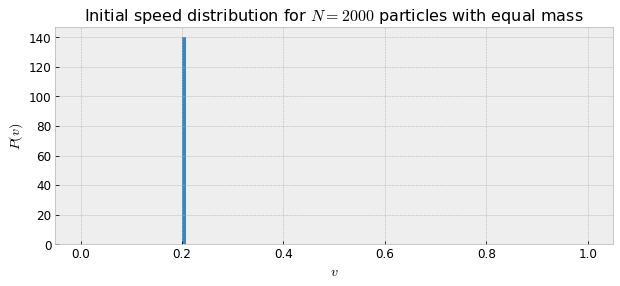

In [101]:
#plt.figure(figsize=(15, 7))
plt.figure()
hist, bin_edges = np.histogram(initial_speeds, bins=number_of_bins, range=(0, 1), density=True)
# plt.hist(initial_speeds, range=(0,0.4), bins=25)
plt.bar(bin_edges[:-1], hist, align='edge', width=1/number_of_bins)
plt.xlabel(r'$v$')
plt.ylabel(r'$P(v)$')
plt.title(r'Initial speed distribution for $N=2000$ particles with equal mass')
#plt.grid()
plt.savefig(os.path.join(plots_folder, 'init_speed.pdf'))
plt.show()

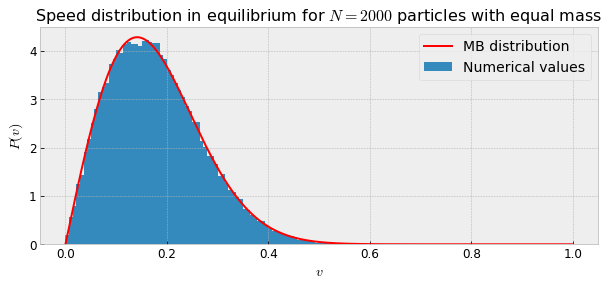

In [100]:
eq_speeds = np.zeros((number_of_runs, N))
for i in range(number_of_runs):
    energy_matrix = np.load(file=os.path.join(results_folder, f'distributionEqParticles_N_2000_eq_energy_matrix_{i}.npy'))
    eq_speeds[i, :] = energy_matrix[:, 1]

kT = compute_kT(eq_speeds, 1)

v = np.linspace(0, 1, 1000)

# average over multiple runs to achieve smoother distributions
hist_plot, bin_edges = average_histogram(eq_speeds, number_of_runs, number_of_bins, 1)

#plt.figure(figsize=(15, 7))
plt.figure()
#plt.grid()
plt.bar(bin_edges[:-1], hist_plot, width=1/number_of_bins, align='edge', label='Numerical values')
plt.plot(v, boltzmann_distribution_2D(v, kT, 1), 'r', label='MB distribution')
plt.xlabel(r'$v$')
plt.ylabel(r'$P(v)$')
plt.title(r'Speed distribution in equilibrium for $N=2000$ particles with equal mass')
plt.legend()

plt.savefig(os.path.join(plots_folder, 'eq_speed.pdf'))
plt.show()

## Speed distribution with particles with different mass
Parameters used:
- N = 2000
- Xi = 1
- v_0 = 0.2
- m_0, m = 1, 4
- radius = 0.007
- stopping criterion: avg_collisions = 0.02*N
- number of runs = 10

In [102]:
N = 2000
number_of_runs = 30
number_of_bins = 140

m0 = 1
m = 4*m0

In [103]:
eq_speeds_m0 = np.zeros((number_of_runs, int(N/2)))
eq_speeds_m = np.zeros((number_of_runs, int(N/2)))
for i in range(number_of_runs):
    energy_matrix = np.load(file=os.path.join(results_folder, f'distributionNEqParticles_N_{N}_eq_energy_matrix_{i}.npy'))
    eq_speeds_m0[i, :] = energy_matrix[:int(N/2), 1]
    eq_speeds_m[i, :] = energy_matrix[int(N/2):, 1]

kT_m0 = compute_kT(eq_speeds_m0, m0)
kT_m = compute_kT(eq_speeds_m, m)
v = np.linspace(0, 1, 1000)

# average over multiple runs to achieve smoother distributions
hist_plot_m0, bin_edges = average_histogram(eq_speeds_m0, number_of_runs, number_of_bins, m0)
hist_plot_m, bin_edges = average_histogram(eq_speeds_m, number_of_runs, number_of_bins, m)

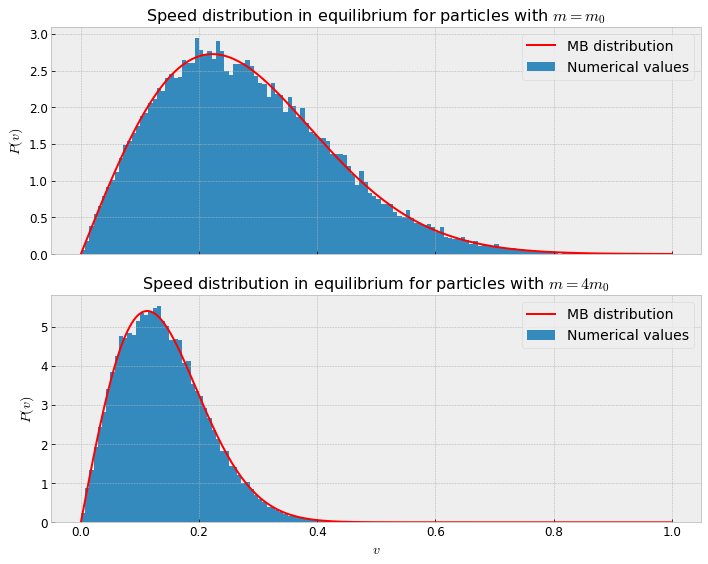

In [148]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 8))
#plt.figure()
mb_distribution_m0 = boltzmann_distribution_2D(v, kT_m0, m0)
axes[0].bar(bin_edges[:-1], hist_plot_m0, width=1/number_of_bins, align='edge', label='Numerical values')
axes[0].plot(v, mb_distribution_m0, 'r', label='MB distribution')
#plt.xlabel(r'$v$')
axes[0].set_ylabel(r'$P(v)$')
axes[0].set_title(r'Speed distribution in equilibrium for particles with $m=m_0$')
axes[0].legend()
#plt.savefig(os.path.join(plots_folder, 'eq_speed_m0.pdf'))
#plt.show()
#plt.figure()
mb_distribution_m = boltzmann_distribution_2D(v, kT_m, m)
axes[1].bar(bin_edges[:-1], hist_plot_m, width=1/number_of_bins, align='edge', label='Numerical values')
axes[1].plot(v, mb_distribution_m, 'r', label='MB distribution')
axes[1].set_xlabel(r'$v$')
axes[1].set_ylabel(r'$P(v)$')
axes[1].set_title(r'Speed distribution in equilibrium for particles with $m=4m_0$')
axes[1].legend()
plt.tight_layout()
plt.savefig(os.path.join(plots_folder, 'eq_speed_m_m0.pdf'))
plt.show()

## Energy development as a function of time for particles with different mass
Parameters used:
- N = 2000
- Xi = 0.8, 0.9, 1
- v_0 = 0.2
- radius = 0.01
- m_0, m = 1, 4
- stopping criterion: simulation_time = 1, output_timestep = 0.01
- number_of_realizations = 5

In [108]:
xi_list = [1, 0.9, 0.8]
N = 2000

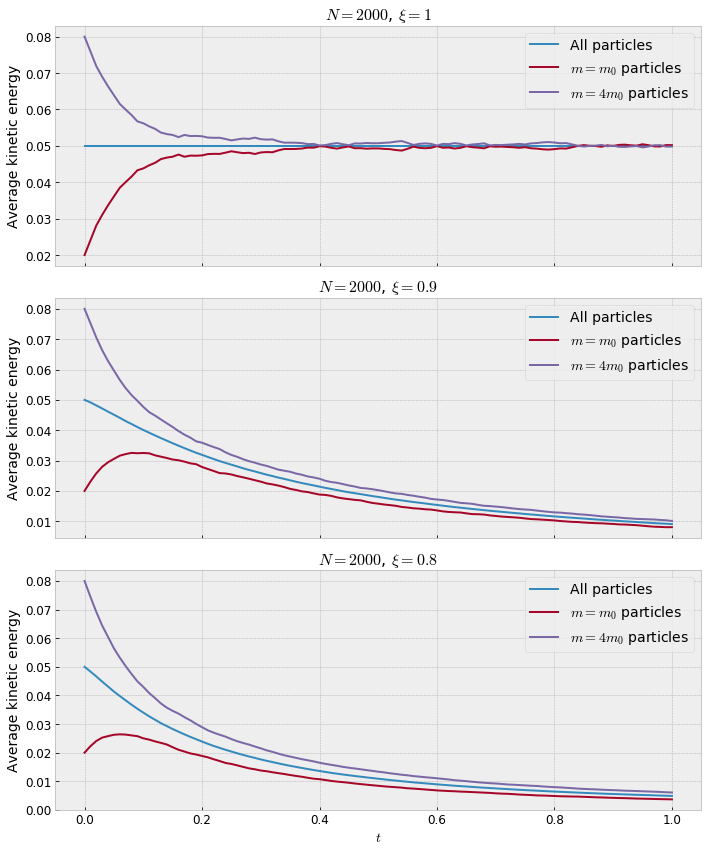

In [147]:
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(10, 12))
for counter, xi in enumerate(xi_list):
    energy_dev_matrix = np.load(file=os.path.join(results_folder, f'energyDevNEqParticles_N_{N}_xi_{xi}.npy'))
    time_array = energy_dev_matrix[:, 0]
    avg_energy_array = energy_dev_matrix[:, 1]
    avg_energy_m0_array = energy_dev_matrix[:, 2]
    avg_energy_m_array = energy_dev_matrix[:, 3]
    #plt.figure(figsize=(15, 7))
    #plt.figure()
    axes[counter].plot(time_array, avg_energy_array, label='All particles')
    axes[counter].plot(time_array, avg_energy_m0_array, label=r'$m=m_0$ particles')
    axes[counter].plot(time_array, avg_energy_m_array, label=r'$m=4m_0$ particles')
    axes[counter].legend()
    axes[counter].set_title(r'$N={}$, $\xi={}$'.format(N, xi))
    #plt.xlabel(r'$t$')
    axes[counter].set_ylabel('Average kinetic energy')
    #plt.savefig(os.path.join(plots_folder, f'energy_development_xi_{xi}.pdf'))
    #plt.show()
axes[2].set_xlabel(r'$t$')
plt.tight_layout()
plt.savefig(os.path.join(plots_folder, f'energy_development_xi.pdf'))
plt.show()

In [4]:
energy_dev_matrix = np.load(file=os.path.join(results_folder, f'energyDevNEqParticles_N_{2000}_xi_{0.9}.npy'))
time = energy_dev_matrix[:, 0]
avg_values = energy_dev_matrix[:, 1]

In [5]:
def E(t, tau):
    E_0 = 0.05
    return E_0*(1+t/tau)**(-2)

In [6]:
popt, pcov = curve_fit(E, time, avg_values)

In [9]:
popt

array([0.76027879])

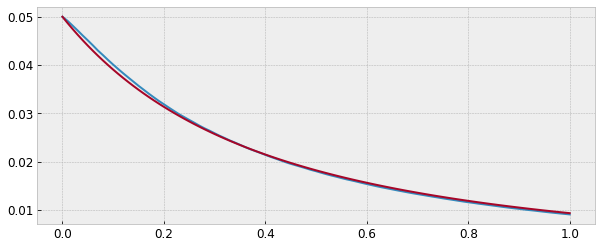

In [8]:
plt.figure()
plt.plot(time, avg_values)
plt.plot(time, E(time, *popt))
plt.show()

## Parameter study of crater formation
Parameters used:
- N = 5001. 1 projectile and 5000 particles in the wall.
- Xi = [0.6, ..., 0.8]
- v_0_projectile = [2, ..., 9]
- v0_wall_particles = 0
- radius_wall_particles = 0.004
- radius_projectile = radius_wall_particles*[1, ...,10]
- mass_particles_in_wall = 1
- mass_projectile = mass_wall_particles*[3, ..., 30]
- stopping criterion: energy < 0.1*initial_energy

In [112]:
parameter_study_mass = np.load(file=os.path.join(results_folder, 'craterFormation_N_5001_mass_study.npy'))
parameter_study_radius = np.load(file=os.path.join(results_folder, 'craterFormation_N_5001_radius_study.npy'))
parameter_study_speed = np.load(file=os.path.join(results_folder, 'craterFormation_N_5001_speed_study.npy'))
parameter_study_xi = np.load(file=os.path.join(results_folder, 'craterFormation_N_5001_xi_study.npy'))

### Mass of projectile

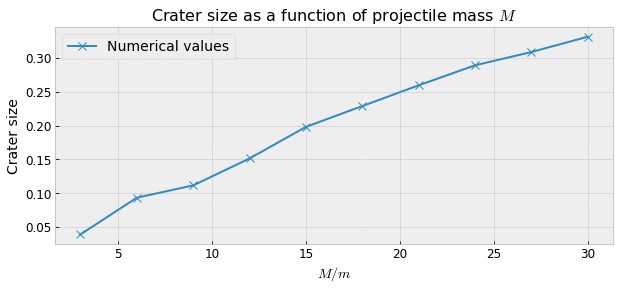

In [114]:
#plt.figure(figsize=(15, 7))
plt.figure()
plt.plot(parameter_study_mass[:, 0], parameter_study_mass[:, 1], '-x', label='Numerical values')
plt.xlabel(r'$M/m$')
plt.ylabel('Crater size')
plt.title(r'Crater size as a function of projectile mass $M$')
plt.legend()
plt.savefig(os.path.join(plots_folder, f'crater_size_mass.pdf'))
plt.show()

### Radius of projectile

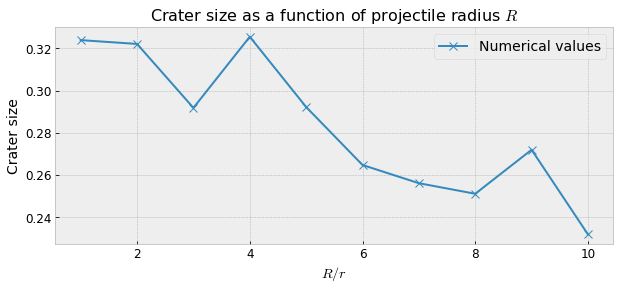

In [115]:
plt.figure()
plt.plot(parameter_study_radius[:, 0], parameter_study_radius[:, 1], '-x', label='Numerical values')
plt.xlabel(r'$R/r$')
plt.ylabel('Crater size')
plt.title('Crater size as a function of projectile radius $R$')
plt.legend()
plt.savefig(os.path.join(plots_folder, f'crater_size_radius.pdf'))
plt.show()

### Speed of projectile

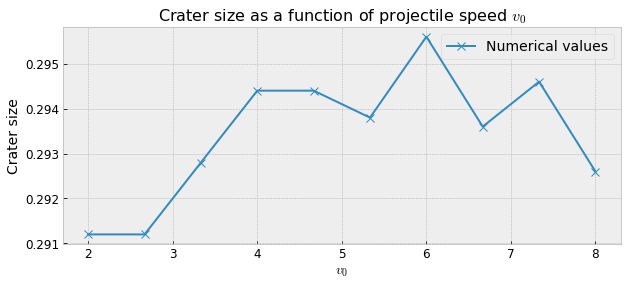

In [116]:
plt.figure()
plt.plot(parameter_study_speed[:, 0], parameter_study_speed[:, 1], '-x', label='Numerical values')
plt.xlabel(r'$v_0$')
plt.ylabel('Crater size')
plt.title(r'Crater size as a function of projectile speed $v_0$')
plt.legend()
plt.savefig(os.path.join(plots_folder, f'crater_size_speed.pdf'))
plt.show()

### Restitution coefficient

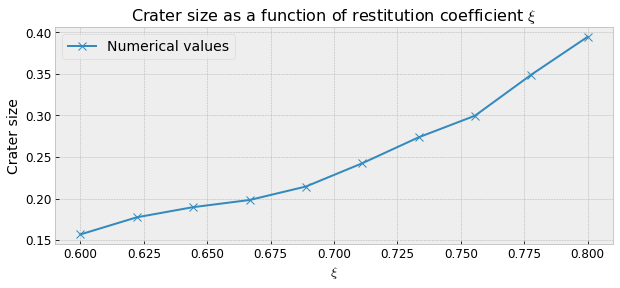

In [117]:
plt.figure()
plt.plot(parameter_study_xi[:, 0], parameter_study_xi[:, 1], '-x', label='Numerical values')
plt.xlabel(r'$\xi$')
plt.ylabel('Crater size')
plt.title(r'Crater size as a function of restitution coefficient $\xi$')
plt.legend()
plt.savefig(os.path.join(plots_folder, f'crater_size_xi.pdf'))
plt.show()

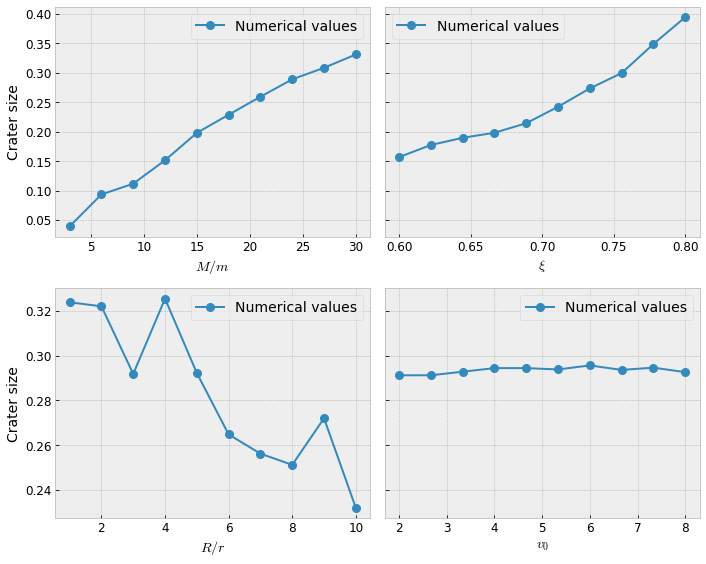

In [161]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey='row', figsize=(10, 8))
axes[0,0].plot(parameter_study_mass[:, 0], parameter_study_mass[:, 1], '-o', label='Numerical values')
axes[0,0].set_xlabel(r'$M/m$')
axes[0,0].set_ylabel('Crater size')
axes[0,0].legend()
axes[0,1].plot(parameter_study_xi[:, 0], parameter_study_xi[:, 1], '-o', label='Numerical values')
axes[0,1].set_xlabel(r'$\xi$')
axes[0,1].legend()
axes[1,0].plot(parameter_study_radius[:, 0], parameter_study_radius[:, 1], '-o', label='Numerical values')
axes[1,0].set_xlabel(r'$R/r$')
axes[1,0].set_ylabel('Crater size')
axes[1,0].legend()
axes[1,1].plot(parameter_study_speed[:, 0], parameter_study_speed[:, 1], '-o', label='Numerical values')
axes[1,1].set_xlabel(r'$v_0$')
axes[1,1].legend()
plt.tight_layout()
plt.savefig(os.path.join(plots_folder, f'crater_size.pdf'))
plt.show()

## Mean free path
Parameters used:
- N = 2000
- rad = 0.007
- t_stop = 5
- xi = 1
- v0 = 0.2
- mask = dist_to_center < 0.2

In [14]:
N = 2000
runs = 50
parameters = 10
mfp_matrix_0 = np.load(os.path.join(results_folder, f'mean_free_path_N_{N}_func_radius_run_0.npy'))
r_values = mfp_matrix_0[:, 0]
mfp_matrix_multiple = np.zeros((runs, parameters))

In [15]:
for i in range(runs):
    mfp_info = np.load(os.path.join(results_folder, f'mean_free_path_N_{N}_func_radius_run_{i}.npy'))
    mfp_matrix_multiple[i, :] = mfp_info[:, 1]

In [16]:
radius = r_values
avg_mfp = np.mean(mfp_matrix_multiple, axis=0)
std_mfp = np.std(mfp_matrix_multiple, axis=0)
th_mfp = mean_free_path(N, radius)

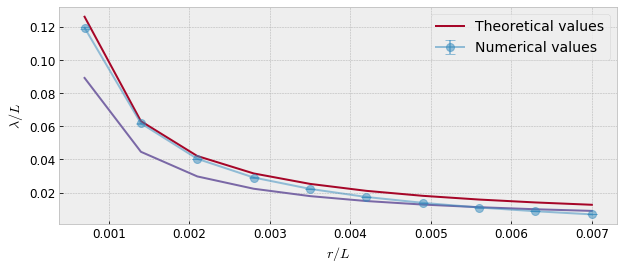

In [26]:
plt.figure()
plt.errorbar(radius, avg_mfp, yerr=std_mfp/np.sqrt(runs), fmt="-o", capsize=5, alpha=0.5, label="Numerical values")
plt.plot(radius, th_mfp, '-', label='Theoretical values')
#plt.plot(radius, (th_mfp-avg_mfp)/th_mfp)
eta = np.pi*N*radius**2
#plt.plot(radius, np.pi*2*radius/(2**(9/2)*eta))
A = 4
plt.plot(radius, 1/(A*N*2*radius))
plt.xlabel(r'$r/L$')
plt.ylabel(r'$\lambda/L$')
#plt.title(r'Mean free path, $\lambda$, as a function of radius, $r$, for $N={}$'.format(N))
plt.legend()
plt.savefig(os.path.join(plots_folder, f'mfp_2000.pdf'))
plt.show()

In [10]:
N = 10000
runs = 3
parameters = 10
mfp_matrix_0 = np.load(os.path.join(results_folder, f'mean_free_path_N_{N}_func_radius_run_1.npy'))
r_values = mfp_matrix_0[:, 0]
mfp_matrix_multiple = np.zeros((runs, parameters))

In [11]:
for i in range(runs):
    mfp_info = np.load(os.path.join(results_folder, f'mean_free_path_N_{N}_func_radius_run_{i}.npy'))
    mfp_matrix_multiple[i, :] = mfp_info[:, 1]

In [12]:
radius = r_values
avg_mfp = np.mean(mfp_matrix_multiple, axis=0)
std_mfp = np.std(mfp_matrix_multiple, axis=0)
th_mfp = mean_free_path(N, radius)

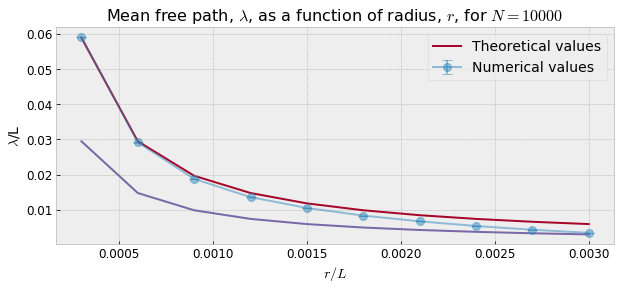

In [13]:
plt.figure()
# plt.plot(radius, comp_mfp, '-x', label='Numerical results')
plt.errorbar(radius, avg_mfp, yerr=std_mfp/np.sqrt(runs), fmt="-o", capsize=5, alpha=0.5, label="Numerical values")
plt.plot(radius, th_mfp, '-', label='Theoretical values')
eta = np.pi*N*radius**2
plt.plot(radius, np.pi*2*radius/(2**(9/2)*eta))
plt.xlabel(r'$r/L$')
plt.ylabel(r'$\lambda$/L')
plt.title(r'Mean free path, $\lambda$, as a function of radius, $r$, for $N={}$'.format(N))
plt.legend()
plt.show()

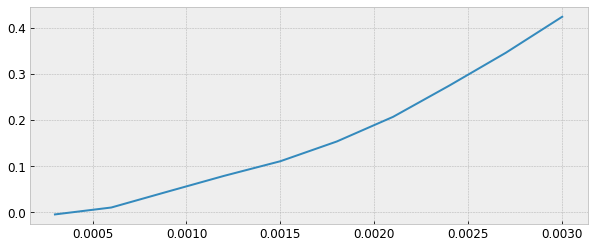

In [179]:
plt.figure()
plt.plot(radius, (th_mfp-avg_mfp)/th_mfp)
plt.show()

## Fractal properties
Parameters used:
- N = 2000
- rad = 0.007
- v0 = 0.2
- xi = 1
- mask = particle closest to center.
- stopping criterion = E_stop = 1e-09

In [17]:
N_array = [2000, 5000]
radius_values = [0.007, 0.004]

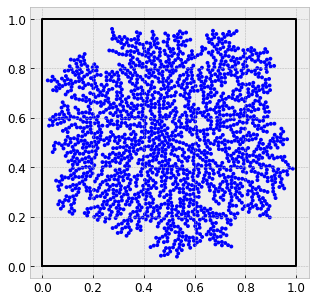

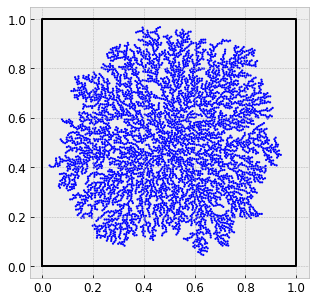

In [18]:
#fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,4))
for i in range(2):
    N = N_array[i]
    radius = radius_values[i]
    radius_array = np.ones(N)*radius
    positions = np.load(file=os.path.join(results_folder, f'fractalPositions_N_{N}_rad_{radius}.npy'))

    fig, ax = plt.subplots(figsize=(5, 5))
    coll = matplotlib.collections.EllipseCollection(radius_array * 2, radius_array * 2,
                                                    np.zeros_like(radius_array),
                                                    offsets=positions, units='width',
                                                    transOffset=ax.transData)
    ax.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], 'k')
    ax.add_collection(coll)
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    plt.savefig(os.path.join(plots_folder, f"fractal_{N}.pdf"))
    plt.show()

## Diffusion properties of single particle in middle
Parameters used:
- N = 2000
- Xi = 1
- v_0 = 0.2
- radius = 0.007
- mass = 1
- criterion to be in middle = distance from [0.5, 0.5] < 0.1
- stopping criterion: avg_collisions = 0.02*N